In [1]:
import sys
sys.path.append("..")

import SimpleITK as sitk
from utils.plot import plot_volume, plot_grid
import numpy as np
from tqdm import tqdm
import pandas as pd
import pydicom as pyd
from typing import Dict, Any
from utils.config import CONFIG
import cv2 as cv
from glob import glob
from ct.utils import read_dcm
items = list(glob(f"{CONFIG.BRIXIA_DIR}/*.dcm"))

In [11]:
reader = sitk.ImageFileReader()
reader.SetFileName(items[4])
img = reader.Execute()
photometric = img.GetMetaData("0028|0004").strip()
print(photometric)
img = sitk.RescaleIntensity(img, 0, 255)
img = sitk.GetArrayFromImage(img)

MONOCHROME2


In [13]:
img.dtype

dtype('uint16')

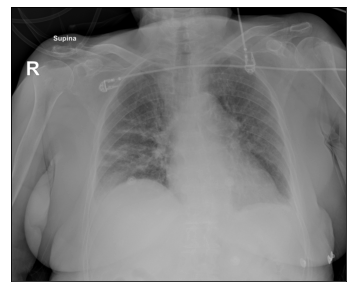

In [12]:
plot_grid([img[0]])

In [4]:
print(items[0])

/data/brixia/17949857545064312143.dcm


In [3]:
img.GetMetaData('0028|0004').strip()

'MONOCHROME1'

In [36]:
img.GetSize()

(3032, 2520, 1)

interactive(children=(IntSlider(value=0, description='val', max=0), Output()), _dom_classes=('widget-interact'…

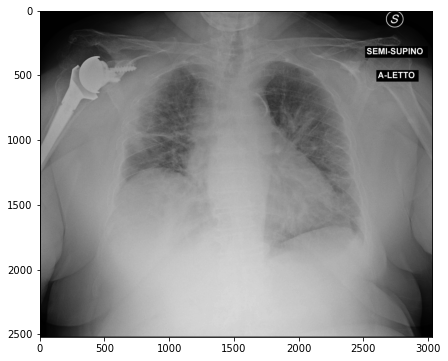

In [38]:
plot_volume(sitk.GetArrayFromImage(img))

In [23]:

imgs = [pyd.dcmread(item).pixel_array for item in items[:10]]
# imgs = [pyd.dcmread(item).PhotometricInterpretation for item in items[:20]]

In [26]:
imgs[0].min(), imgs[0].max()

(0, 4095)

In [27]:
imgs[4].min(), imgs[4].max()

(13, 65280)

In [28]:
imgs = [pyd.dcmread(item).HighBit for item in items[:20]]

In [17]:
imgs[0].dtype

dtype('uint16')

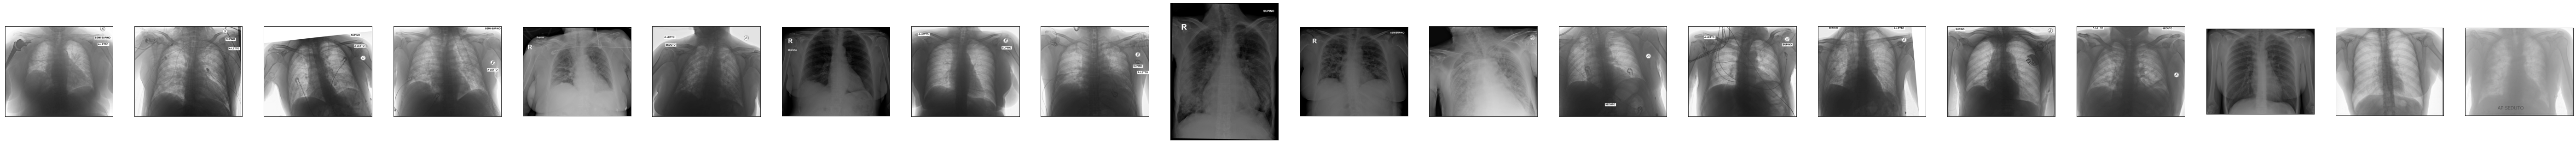

In [13]:
plot_grid(imgs)

In [4]:
pd.read_pickle("/workspace/output/lidc/test/metadata.pkl").iloc[[154, 128, 80]]["subject"].tolist()

IndexError: positional indexers are out-of-bounds

In [20]:
vol = normalize_hu(read_dcm(items[79])[1])
circle_mask(vol)
# plot_volume(vol)

ImageSeriesReader (0x55d2fde800b0): Non uniform sampling or missing slices detected,  maximum nonuniformity:291.747



array([], shape=(0, 440, 440), dtype=uint8)

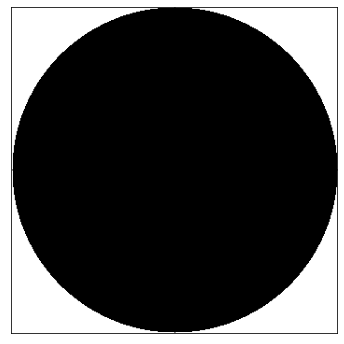

In [3]:
N = 350
circle = np.zeros((N,N))
center = N // 2

for i in range(N):
    for j in range(N):
        if ((i - center) ** 2 + (j - center) ** 2) > (N // 2 - 1
        ) ** 2:
            circle[i][j] = 1

plot([circle])

interactive(children=(IntSlider(value=1, description='val', max=306), Output()), _dom_classes=('widget-interac…

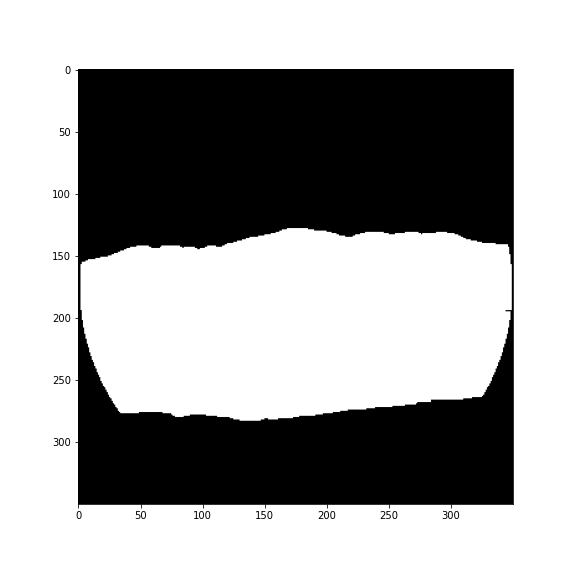

In [14]:
%matplotlib widget
masks = [get_body_mask(np.where(circle, 0, normalize_hu(img)), 30)[0] for img in vol]
plot_volume(masks)

In [5]:
df[df["Subject"] == 966].sort_values(by="Path")

,Subject,ID,Path,PhotometricInterpretation,SliceLocation,SliceThickness,ImagePositionPatient0,ImagePositionPatient1,ImagePositionPatient2,PatientPosition,ImageOrientationPatient,SeriesDescription,SeriesNumber,PixelSpacing0,PixelSpacing1,ImageType0,ImageType1,ImageType2,ImageType3,HighBit
120344,966,1-001,/data/lidc/manifest-1600709154662/LIDC-IDRI/LI...,MONOCHROME2,7.420000,2.5,-179.699997,-175.0,7.420000,FFS,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",NaN,3000280.0,0.683594,0.683594,ORIGINAL,PRIMARY,AXIAL,NONE,15
120401,966,1-002,/data/lidc/manifest-1600709154662/LIDC-IDRI/LI...,MONOCHROME2,5.420000,2.5,-179.699997,-175.0,5.420000,FFS,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",NaN,3000280.0,0.683594,0.683594,ORIGINAL,PRIMARY,AXIAL,NONE,15
120374,966,1-003,/data/lidc/manifest-1600709154662/LIDC-IDRI/LI...,MONOCHROME2,3.420000,2.5,-179.699997,-175.0,3.420000,FFS,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",NaN,3000280.0,0.683594,0.683594,ORIGINAL,PRIMARY,AXIAL,NONE,15
120323,966,1-004,/data/lidc/manifest-1600709154662/LIDC-IDRI/LI...,MONOCHROME2,1.420000,2.5,-179.699997,-175.0,1.420000,FFS,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",NaN,3000280.0,0.683594,0.683594,ORIGINAL,PRIMARY,AXIAL,NONE,15
120386,966,1-005,/data/lidc/manifest-1600709154662/LIDC-IDRI/LI...,MONOCHROME2,-0.580000,2.5,-179.699997,-175.0,-0.580000,FFS,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",NaN,3000280.0,0.683594,0.683594,ORIGINAL,PRIMARY,AXIAL,NONE,15
120294,966,1-006,/data/lidc/manifest-1600709154662/LIDC-IDRI/LI...,MONOCHROME2,-2.580000,2.5,-179.699997,-175.0,-2.580000,FFS,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",NaN,3000280.0,0.683594,0.683594,ORIGINAL,PRIMARY,AXIAL,NONE,15
120370,966,1-007,/data/lidc/manifest-1600709154662/LIDC-IDRI/LI...,MONOCHROME2,-4.580000,2.5,-179.699997,-175.0,-4.580000,FFS,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",NaN,3000280.0,0.683594,0.683594,ORIGINAL,PRIMARY,AXIAL,NONE,15
120396,966,1-008,/data/lidc/manifest-1600709154662/LIDC-IDRI/LI...,MONOCHROME2,-6.580000,2.5,-179.699997,-175.0,-6.580000,FFS,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",NaN,3000280.0,0.683594,0.683594,ORIGINAL,PRIMARY,AXIAL,NONE,15
120424,966,1-009,/data/lidc/manifest-1600709154662/LIDC-IDRI/LI...,MONOCHROME2,-8.580000,2.5,-179.699997,-175.0,-8.580000,FFS,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",NaN,3000280.0,0.683594,0.683594,ORIGINAL,PRIMARY,AXIAL,NONE,15
120420,966,1-010,/data/lidc/manifest-1600709154662/LIDC-IDRI/LI...,MONOCHROME2,-10.580000,2.5,-179.699997,-175.0,-10.580000,FFS,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000...",NaN,3000280.0,0.683594,0.683594,ORIGINAL,PRIMARY,AXIAL,NONE,15


In [10]:
df_count = df.groupby(["Subject", "SeriesNumber"]).count()
df_count[df_count["Path"] < 100]

,,ID,Path,PhotometricInterpretation,SliceLocation,SliceThickness,ImagePositionPatient0,ImagePositionPatient1,ImagePositionPatient2,PatientPosition,ImageOrientationPatient,SeriesDescription,PixelSpacing0,PixelSpacing1,ImageType0,ImageType1,ImageType2,ImageType3,HighBit
Subject,SeriesNumber,,,,,,,,,,,,,,,,,,
365,5409.0,98,98,98,98,98,98,98,98,98,98,0,98,98,98,98,98,98,98


In [59]:
df[df["Subject"] == 678]

,Subject,ID,Path,PhotometricInterpretation,SliceLocation,SliceThickness,ImagePositionPatient0,ImagePositionPatient1,ImagePositionPatient2,PatientPosition,ImageOrientationPatient,SeriesDescription,SeriesNumber,PixelSpacing0,PixelSpacing1,ImageType0,ImageType1,ImageType2,ImageType3,HighBit
70346,678,1-010,/data/lidc/manifest-1600709154662/LIDC-IDRI/LIDC-IDRI-0678/01-01-2000-NA-NA-72850/3000016.000000-NA-10450/1-010.dcm,MONOCHROME2,9.6,2.5,-149.0,-135.0,9.6,FFS,"[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]",NaN,3000016.0,0.527344,0.527344,ORIGINAL,PRIMARY,AXIAL,NONE,15
